In [2]:

from src.board import Board

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [ ]:
class Entity:
    def aleatoire():
        pass
    def glisseur1():
        pass
    def glisseur2():
        pass
    def moulin():
        pass
    def canon():
        pass

In [ ]:

class Board:
    def __init__(self, size, init_vector=None, **kwargs):
        if size <  5:
            raise ValueError(f'{size} too small, minimum 5')
        elif type(size) is not int:
            raise ValueError(f'{size} not an integer')
        self.board = self.init_board(size, init_vector)
    
    @staticmethod    
    def init_board(size, init_vector=None):
        board = np.zeros((size, size), dtype=int)
        if init_vector is not None:
            for (i, j) in init_vector:
                board[i,j] = 1
        return board
    
class Rules:        
    @staticmethod
    def rules(sub_matrix):
        current_state = sub_matrix[1, 1]
        voisins = np.sum(sub_matrix) - current_state
        if current_state :
            if voisins in [2, 3]:
                return current_state
            else :
                return 0
        elif not current_state:
            if voisins == 3:
                return 1
            else :
                return current_state
            
class Tools:
    @staticmethod
    def array_in_liste(vect, liste):
        for item in liste:
            if np.all(item == vect):
                return True
            else:
                return False

    @staticmethod
    def augmentation_matrix(matrix, n=3):
        li, co = matrix.shape[0]+2*n, matrix.shape[1]+2*n
        out = np.zeros((li, co))
        out[n:li-n, n:co-n] = matrix
        return out
    
    @staticmethod
    def reduction_matrix(matrix, n=3):
        li, co = matrix.shape[0], matrix.shape[1]
        return matrix[n:li-n, n:co-n]

class State:
    def __init__(self, init_board):
        self.board = self.inc_board(init_board)
    # pour gagner du temps voir si une vectorisation n'est pas possible
    @staticmethod
    def inc_board(init_board):
        inc_board = np.zeros(init_board.shape, dtype=int)
        for i in range(1, init_board.shape[0]-1):
            for j in range(1, init_board.shape[0]-1):
                sub_matrix = init_board[i-1 : i+2, j-1 : j+2]
                inc_board[i, j] = Rules.rules(sub_matrix)
        return inc_board
    
class Iteration:
    @staticmethod
    def iteration(init_board, n_max = 10, n_augmentation=3):
        board = Tools.augmentation_matrix(init_board, n_augmentation)
        res = [(init_board, 0)]
        for n in range(1, n_max):
            board = State(board).board
            res.append((Tools.reduction_matrix(board, 3), n))
            if np.sum(Tools.reduction_matrix(board, 3)) == 0 :##or array_in_liste(board, res):
                break
        return res
    
class PlotBoard:
    @staticmethod
    def grid(size):
        x, y = np.meshgrid(np.arange(-0.5, size, 0.5)[::2], np.arange(-0.5, size))
        fig, ax = plt.subplots(figsize=(10, 10), dpi=50)
        ax.plot(x, -y, c='k', lw=0.5,)
        ax.plot(y, -x, c='k', lw=0.5)
        ax.axis('off')
        return fig, ax

    @classmethod
    def plot(cls, board, save_fig=False ,title=None, loc='data'):
        size = board.shape[0]
        fig, ax = cls.grid(size)
        for i in range(size):
            for j in range(size):
                if board[i, j] == 1:
                    ax.add_patch(plt.Rectangle(((j-0.5), -(i-0.5)), 1, -1, facecolor='pink', edgecolor='black'))
        plt.tight_layout()
        if title is not None:
            plt.title(title)
        if save_fig:
            path = os.path.join(loc, f'{title}.png')
            plt.savefig(path)
        return None
        
class Animation:
    @staticmethod
    def animation(board, name=None, n_max=30, **kwargs):
        name = f"life_game" if name is None else name

        etats = Iteration.iteration(board, n_max=30)
        def init_board():
            ax.plot(x, -y, c='k', lw=0.5,)
            ax.plot(y, -x, c='k', lw=0.5)
            ax.axis('off')

        def plot_board(state):
            size = state[0].shape[0]
            for i in range(size):
                for j in range(size):
                    if state[0][i, j] == 1:
                        ax.add_patch(plt.Rectangle(((j-0.5), -(i-0.5)), 1, -1, facecolor='pink', edgecolor='black'))
            plt.title(f"State {state[1]}", loc='center')
            plt.tight_layout()

        size = board.shape[0]
        x, y = np.meshgrid(np.arange(-0.5, size, 0.5)[::2], np.arange(-0.5, size))
        fig, ax = plt.subplots(figsize=(10, 10), dpi=50)
        init_board()

        def update(state):
            ax.clear()
            init_board()
            plot_board(state)

        ani = FuncAnimation(fig, update, frames=etats, repeat=False, interval=0.01, **kwargs)
        ani.save(f'{name}.gif', writer=PillowWriter(fps=120), **kwargs)

        

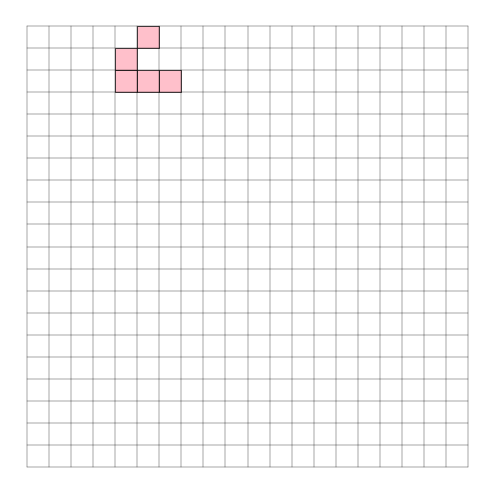

In [10]:
t0 = Board(20, [[2, 6], [2, 5], [2, 4], [1, 4], [0, 5]])
t0.plot()

In [9]:
t0.animate()